### Линейная коррекция

In [15]:
%matplotlib inline

In [16]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
from numpy import clip, dstack, roll

In [17]:
img = imread('1.jpg')

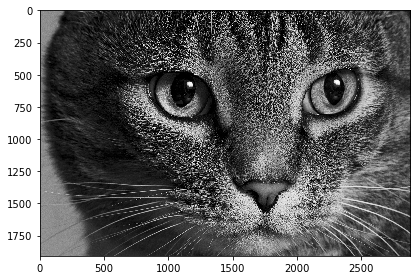

In [18]:
imshow(img)

In [19]:
img_f = img_as_float(img)

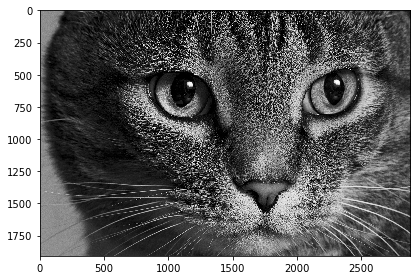

In [20]:
temp = (img_f - img_f.min()) * 255.0 / (img_f.max() - img_f.min())
res_img = temp.astype('uint8')
imshow(res_img)

### Автоконтраст цветного изображения 

In [21]:
img = imread('2.jpg')
img_f = img_as_float(img)
r = img_f[:, :, 0]
g = img_f[:, :, 1]
b = img_f[:, :, 2] 

In [22]:
y = 0.2126*r + 0.7152*g + 0.0722*b
u = -0.0999*r - 0.3360*g + 0.4360*b
v = 0.6150*r - 0.5586*g - 0.0563*b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


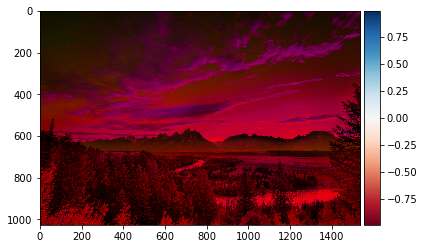

In [23]:
img = dstack((y, u, v))
imshow(img)

In [24]:
r = y + 1.2803 * v
g = y - 0.148 * u - 0.3805 * v
b = y + 2.1279 * u

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


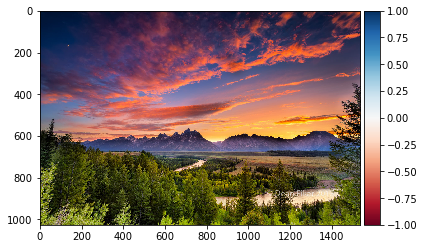

In [25]:
img = dstack((r, g, b))
imshow(img)

###  Модель серого мира

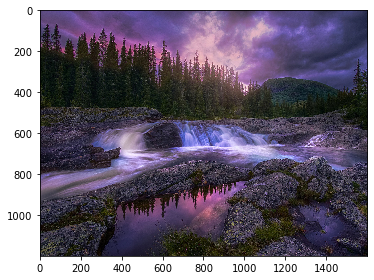

In [32]:
import numpy as np
img = imread('3.jpg')
img_f = img_as_float(img)
imshow(img)

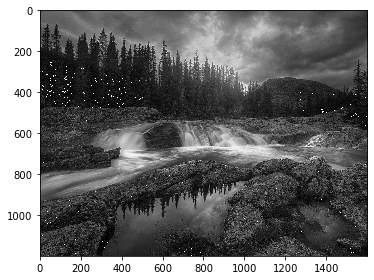

In [33]:
img_f = img_as_float(img)
r = img_f[:,:,0]
g = img_f[:,:,1]
b = img_f[:,:,2]
avg = (r / 2 + g / 2 + b /2) / 3
rw = (r / 2) / avg
gw = (g / 2) / avg
bw = (b / 2) / avg
np.seterr(invalid='ignore')
r_r = r / rw 
imshow(r_r)

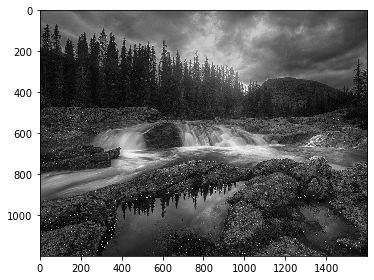

In [34]:
g_g = g / gw 
imshow(g_g)

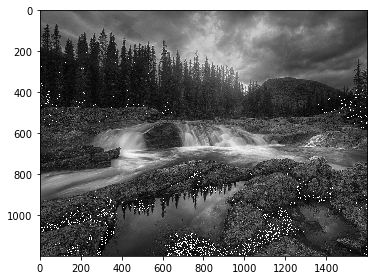

In [35]:
b_b = b / bw
imshow(b_b)

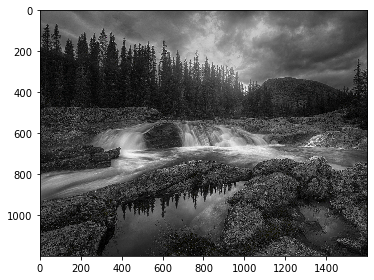

In [36]:
img_rgb = np.dstack((r_r, g_g, b_b))
imshow(img_rgb)

### Выравнивание гистограммы

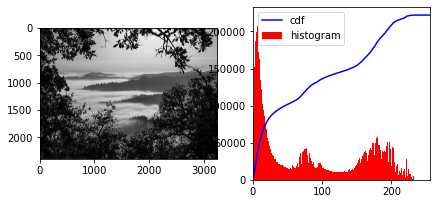

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('4.jpg', 0)
fig = plt.figure(figsize=(7,7))
fig.add_subplot(2,2,1)
plt.imshow(img, cmap="gray")

hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

fig.add_subplot(2,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

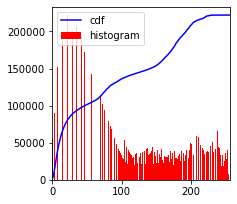

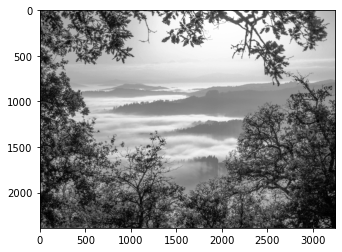

In [38]:
fig2 = plt.figure(figsize=(7,7))
cdf = (cdf-cdf[0]) *255/ (cdf[-1]-1)
cdf = cdf.astype(np.uint8)
img2 = cdf[img]
fig2.add_subplot(2,2,1)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
fig2.add_subplot(2,2,2)
plt.imshow(img2, cmap="gray")